In [1]:
import pandas as pd
import numpy as np
import csv
import gzip
import os
import os
import pandas as pd
from collections import defaultdict
import shutil
import subprocess

In [2]:
df = pd.read_excel("20220209_NTD_CIDR_files.xlsx")
df = df[df['TSCC location'] != 'None'].reset_index(drop=True)

In [3]:
df

,Gleeson ID Disease Code,Gleeson ID Number,Diagnosis,Sex,DNA Status,Sequenced at CIDR?,TSCC location
0,NTD,5327-4-1,"Neural tube defect, tethered defect",M,FMA,CIDR Linkage 2020,/projects/ps-gleesonlab5/CIDR_SNP_array/CIDR20...
1,NTD,5327-4-2,"Neural tube defect, tethered defect",F,FMA,CIDR Linkage 2020,/projects/ps-gleesonlab5/CIDR_SNP_array/CIDR20...
2,NTD,5327-5-1,"Neural tube defect, tethered defect",F,FMA,CIDR Linkage 2020,/projects/ps-gleesonlab5/CIDR_SNP_array/CIDR20...
3,NTD,5341-1-1,Spina bifida,M,FMA,CIDR Linkage 2017,/projects/ps-gleesonlab5/CIDR_SNP_array/CIDR20...
4,NTD,5341-1-2,Spina bifida,F,FMA,CIDR Linkage 2017,/projects/ps-gleesonlab5/CIDR_SNP_array/CIDR20...
...,...,...,...,...,...,...,...
453,NTD,8258-1-2,NaN,F,NaN,CIDR Linkage 2020,/projects/ps-gleesonlab5/CIDR_SNP_array/CIDR20...
454,NTD,8258-2-1,Meningomyelocele,NaN,FMA (blood),CIDR Linkage 2020,/projects/ps-gleesonlab5/CIDR_SNP_array/CIDR20...
455,NTD,8259-1-1,NaN,M,NaN,CIDR Linkage 2020,/projects/ps-gleesonlab5/CIDR_SNP_array/CIDR20...
456,NTD,8259-1-2,NaN,F,NaN,CIDR Linkage 2020,/projects/ps-gleesonlab5/CIDR_SNP_array/CIDR20...


In [4]:
df['fm_code'] = df['Gleeson ID Number'].apply(lambda x: x[:4])
fm_count = df['fm_code'].value_counts()

In [5]:
loc_arr = df['TSCC location'].values
loc_arr

array(['/projects/ps-gleesonlab5/CIDR_SNP_array/CIDR2020/Gleeson_2293/Genotype_and_Intensity_Data_Files/Gleeson_2293_release_genotype_files/205327310020_R07C02-5327_4_1-1-1213414378.csv.gz',
       '/projects/ps-gleesonlab5/CIDR_SNP_array/CIDR2020/Gleeson_2293/Genotype_and_Intensity_Data_Files/Gleeson_2293_release_genotype_files/205327310018_R11C01-5327_4_2-1-1213414386.csv.gz',
       '/projects/ps-gleesonlab5/CIDR_SNP_array/CIDR2020/Gleeson_2293/Genotype_and_Intensity_Data_Files/Gleeson_2293_release_genotype_files/205327310018_R12C01-5327_5_1-1-1213414394.csv.gz',
       '/projects/ps-gleesonlab5/CIDR_SNP_array/CIDR2017/Gleeson_2097_Release/Genotype_and_Intensity_Data_Files/Gleeson_2097_release_genotype_files/5341_1_1-1-0224061658_201869720111_R01C01.csv.gz',
       '/projects/ps-gleesonlab5/CIDR_SNP_array/CIDR2017/Gleeson_2097_Release/Genotype_and_Intensity_Data_Files/Gleeson_2097_release_genotype_files/5341_1_2-1-0224061657_201869720111_R06C01.csv.gz',
       '/projects/ps-gleesonl

In [6]:
for path in loc_arr:
    p_lst = path.split('/')
    cidr_ver = p_lst[4]
    fl_name = p_lst[-1].split('.')[0]
    csv_path = os.path.join('/home/zluo/CNV_pipeline/input/csv', fl_name + '.csv')
    txt_path = os.path.join('/home/zluo/CNV_pipeline/input/txt_orig', fl_name + '.txt')

    with gzip.open(path, mode='rt') as f:
        for i in range(10):
            f.readline()

        csv_content = f.read()

    with open(csv_path, 'w') as new_csv:
        new_csv.write(csv_content)

    df = pd.read_csv(csv_path)
    cols = df.columns
    df_p = pd.DataFrame()
    df_p['Name'] = df[cols[0]]
    df_p['B Allele Freq'] = df['B Allele Freq']
    df_p['Log R Ratio'] = df['Log R Ratio']
    df_p.dropna()

    df_p.to_csv(txt_path, index=False, sep='\t')

Recording Information

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [7]:
df = df_p1

In [8]:
x = df[df['Chromosome'] == '3']['Pos']
y = df[df['Chromosome'] == '3']['Log R Ratio']

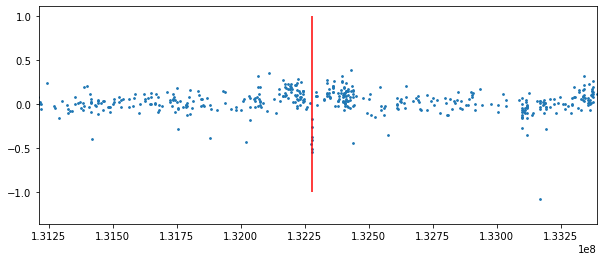

In [15]:
figure(figsize=(10, 4))
plt.xlim(131210000, 133390000) 
plt.scatter(x, y, s=3)
plt.vlines(132278688, ymin=-1, ymax=1, colors='red')

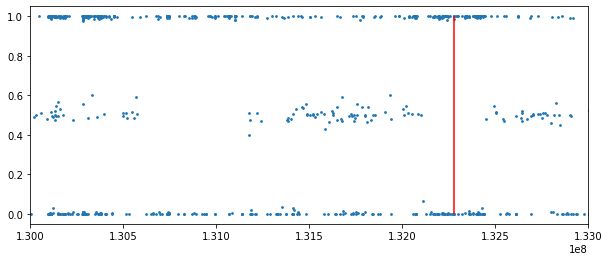

In [12]:
y2 = df[df['Chromosome'] == '3']['B Allele Freq']
figure(figsize=(10, 4))
plt.xlim(130000000, 133000000) 
plt.scatter(x, y2, s=3)
plt.vlines(132278688, ymin=0, ymax=1, colors='red')

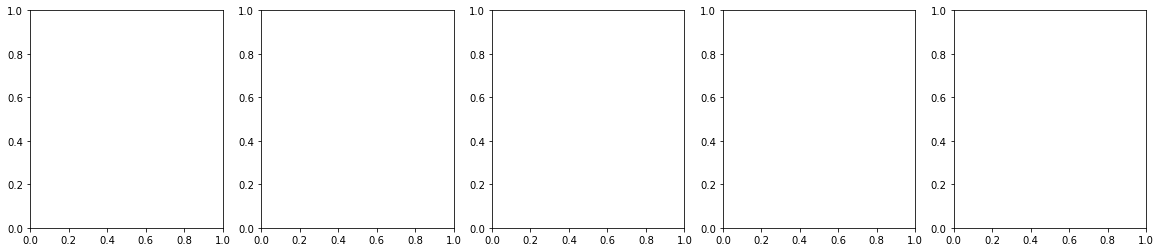

In [56]:
fig = plt.figure(figsize=(20, 4))
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

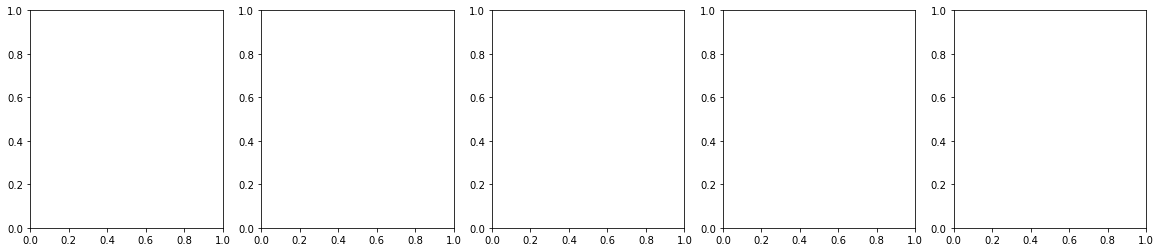

In [57]:
fig2 = plt.figure(figsize=(20, 4))
ax12 = fig2.add_subplot(151)
ax22 = fig2.add_subplot(152)
ax32 = fig2.add_subplot(153)
ax42 = fig2.add_subplot(154)
ax52 = fig2.add_subplot(155)

In [58]:
for df, ax in zip([df_p1, df_p2, df_c1, df_c2, df_c3], [ax1, ax2, ax3, ax4, ax5]):
    x = df[df['Chromosome'] == '3']['Pos']
    y = df[df['Chromosome'] == '3']['Log R Ratio']
    ax.scatter(x, y, s=3)
    ax.set_xlim(131210000, 133390000)
    ax.set_ylim(-7, 1)
    ax.vlines(132278688, ymin=-1, ymax=1, colors='red')

In [59]:
for df, ax in zip([df_p1, df_p2, df_c1, df_c2, df_c3], [ax12, ax22, ax32, ax42, ax52]):
    x = df[df['Chromosome'] == '3']['Pos']
    y = df[df['Chromosome'] == '3']['B Allele Freq']
    ax.scatter(x, y, s=3)
    ax.set_xlim(131210000, 133390000)
    ax.vlines(132278688, ymin=0, ymax=1, colors='red')

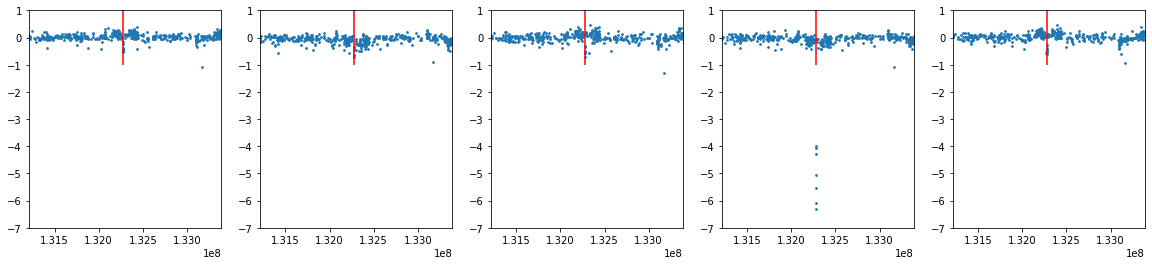

In [60]:
fig

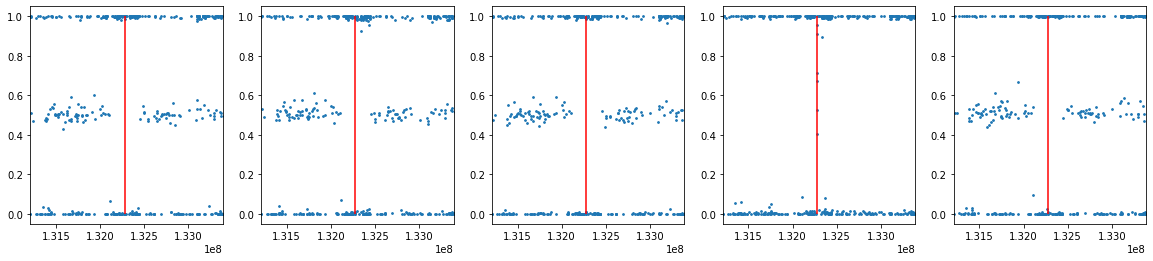

In [61]:
fig2